In [2]:
!pip install openpyxl

In [3]:
import pandas as pd
import torch 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pd.set_option('display.max_columns', None) #Pour voir toutes les colonnes
df = pd.read_excel("data\dataset_02052023.xlsx", engine='openpyxl')
print(df.head())
df.shape

   Num                 Timestamp  Current_J0  Temperature_T0  Current_J1  \
0    1  2022-10-26T08:17:21.847Z    0.109628          27.875   -2.024669   
1    2  2022-10-26T08:17:22.852Z    0.595605          27.875   -2.278456   
2    3  2022-10-26T08:17:23.857Z   -0.229474          27.875   -2.800408   
3    4  2022-10-26T08:17:24.863Z    0.065053          27.875   -3.687768   
4    5  2022-10-26T08:17:25.877Z    0.884140          27.875   -2.938830   

   Temperature_J1  Current_J2  Temperature_J2  Current_J3  Temperature_J3  \
0         29.3750   -1.531442         29.3750   -0.998570         32.1250   
1         29.3125   -0.866556         29.4375   -0.206097         32.1875   
2         29.3125   -2.304336         29.4375   -0.351499         32.1250   
3         29.3125   -1.217652         29.4375   -1.209115         32.1250   
4         29.3750   -1.794076         29.4375   -2.356471         32.1875   

   Current_J4  Temperature_J4  Current_J5  Temperature_J5      Speed_J0  \
0   -

(7409, 24)

# Analyse et prétraitement des données

In [4]:
df = df.drop(columns=['Num'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             7409 non-null   object 
 1   Current_J0            7363 non-null   float64
 2   Temperature_T0        7355 non-null   float64
 3   Current_J1            7355 non-null   float64
 4   Temperature_J1        7355 non-null   float64
 5   Current_J2            7355 non-null   float64
 6   Temperature_J2        7355 non-null   float64
 7   Current_J3            7355 non-null   float64
 8   Temperature_J3        7355 non-null   float64
 9   Current_J4            7355 non-null   float64
 10  Temperature_J4        7355 non-null   float64
 11  Current_J5            7355 non-null   float64
 12  Temperature_J5        7355 non-null   float64
 13  Speed_J0              7355 non-null   float64
 14  Speed_J1              7355 non-null   float64
 15  Speed_J2             

In [5]:
print(df.describe())

        Current_J0  Temperature_T0   Current_J1  Temperature_J1   Current_J2  \
count  7363.000000     7355.000000  7355.000000     7355.000000  7355.000000   
mean     -0.048934       34.906781    -2.297936       37.659636    -1.199381   
std       0.829395        2.762057     0.800450        3.247315     0.609984   
min      -6.247756       27.812500    -5.808734       29.312500    -4.171966   
25%      -0.195026       33.000000    -2.664919       35.375000    -1.552803   
50%      -0.080830       36.500000    -2.236342       39.687500    -1.077137   
75%       0.095959       37.062500    -1.778334       40.125000    -0.838721   
max       6.806938       37.250000     1.083596       40.500000     2.464940   

       Temperature_J2   Current_J3  Temperature_J3   Current_J4  \
count     7355.000000  7355.000000     7355.000000  7355.000000   
mean        38.064064    -0.605312       40.936999    -0.022968   
std          3.311948     0.514937        3.182399     0.630789   
min        

In [6]:
missing_counts = df.isnull().sum()
missing_columns = missing_counts[missing_counts > 0]
print("Colonnes avec valeurs manquantes :\n")
print(missing_columns)

Colonnes avec valeurs manquantes :

Current_J0              46
Temperature_T0          54
Current_J1              54
Temperature_J1          54
Current_J2              54
Temperature_J2          54
Current_J3              54
Temperature_J3          54
Current_J4              54
Temperature_J4          54
Current_J5              54
Temperature_J5          54
Speed_J0                54
Speed_J1                54
Speed_J2                54
Speed_J3                54
Speed_J4                54
Speed_J5                54
Tool_current            54
Robot_ProtectiveStop    54
dtype: int64


In [7]:
df= df.dropna()
print(f"Lignes restantes après suppression : {len(df)}")

Lignes restantes après suppression : 7355


In [8]:
# Eliminer les colonnes à écart type faible
std = df.drop(columns=['Timestamp'], errors='ignore').std()
columns_to_keep = std[std >= 0.1].index
df_filtered = df[columns_to_keep]
df_filtered['Timestamp'] = df['Timestamp']

print("Colonnes conservées après suppression des faibles écarts-types (avec Timestamp) :\n")
print(df_filtered.columns)

Colonnes conservées après suppression des faibles écarts-types (avec Timestamp) :

Index(['Current_J0', 'Temperature_T0', 'Current_J1', 'Temperature_J1',
       'Current_J2', 'Temperature_J2', 'Current_J3', 'Temperature_J3',
       'Current_J4', 'Temperature_J4', 'Current_J5', 'Temperature_J5',
       'Speed_J0', 'Speed_J2', 'Speed_J3', 'Speed_J5', 'cycle ',
       'Robot_ProtectiveStop', 'grip_lost', 'Timestamp'],
      dtype='object')


C:\Users\Lenovo Gaming\AppData\Local\Temp\ipykernel_23184\2970774022.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Timestamp'] = df['Timestamp']


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


df_filtered['Timestamp'] = df_filtered['Timestamp'].astype(str).str.replace('"', '', regex=False)
df_filtered['Timestamp'] = pd.to_datetime(df_filtered['Timestamp'], format='mixed', errors='raise')
is_sorted = df_filtered['Timestamp'].is_monotonic_increasing
print("Données triées par ordre croissant ?", is_sorted)
if not is_sorted:
    df_filtered = df_filtered.sort_values(by='Timestamp').reset_index(drop=True)
    print("Le DataFrame a été trié par ordre chronologique.")
    
le = LabelEncoder()
df_filtered["grip_lost"] = le.fit_transform(df_filtered["grip_lost"])

display(df_filtered.head())

Données triées par ordre croissant ? True


C:\Users\Lenovo Gaming\AppData\Local\Temp\ipykernel_23184\1155076836.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Timestamp'] = df_filtered['Timestamp'].astype(str).str.replace('"', '', regex=False)
C:\Users\Lenovo Gaming\AppData\Local\Temp\ipykernel_23184\1155076836.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Timestamp'] = pd.to_datetime(df_filtered['Timestamp'], format='mixed', errors='raise')
C:\Users\Lenovo Gaming\AppData\Local\Temp\ipykernel_23184\1155076836.py:

,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,Temperature_J4,Current_J5,Temperature_J5,Speed_J0,Speed_J2,Speed_J3,Speed_J5,cycle,Robot_ProtectiveStop,grip_lost,Timestamp
0,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,-0.062540,32.2500,-0.152622,32.0000,2.955651e-01,0.001310,-0.132836,-0.152962,1,0.0,0,2022-10-26 08:17:21.847000+00:00
1,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,-1.062762,32.2500,-0.260764,32.0000,-7.391485e-30,0.002185,0.001668,0.000417,1,0.0,0,2022-10-26 08:17:22.852000+00:00
2,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,-0.668869,32.3125,0.039071,32.0625,1.369386e-01,-2.535874,0.379867,-0.496856,1,0.0,0,2022-10-26 08:17:23.857000+00:00
3,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,-0.819755,32.2500,0.153903,32.0000,-9.030032e-02,-0.009096,-0.384196,0.425559,1,0.0,0,2022-10-26 08:17:24.863000+00:00
4,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,-0.966427,32.3125,0.178998,32.0000,1.268088e-01,0.001138,-0.353284,0.180989,1,0.0,0,2022-10-26 08:17:25.877000+00:00


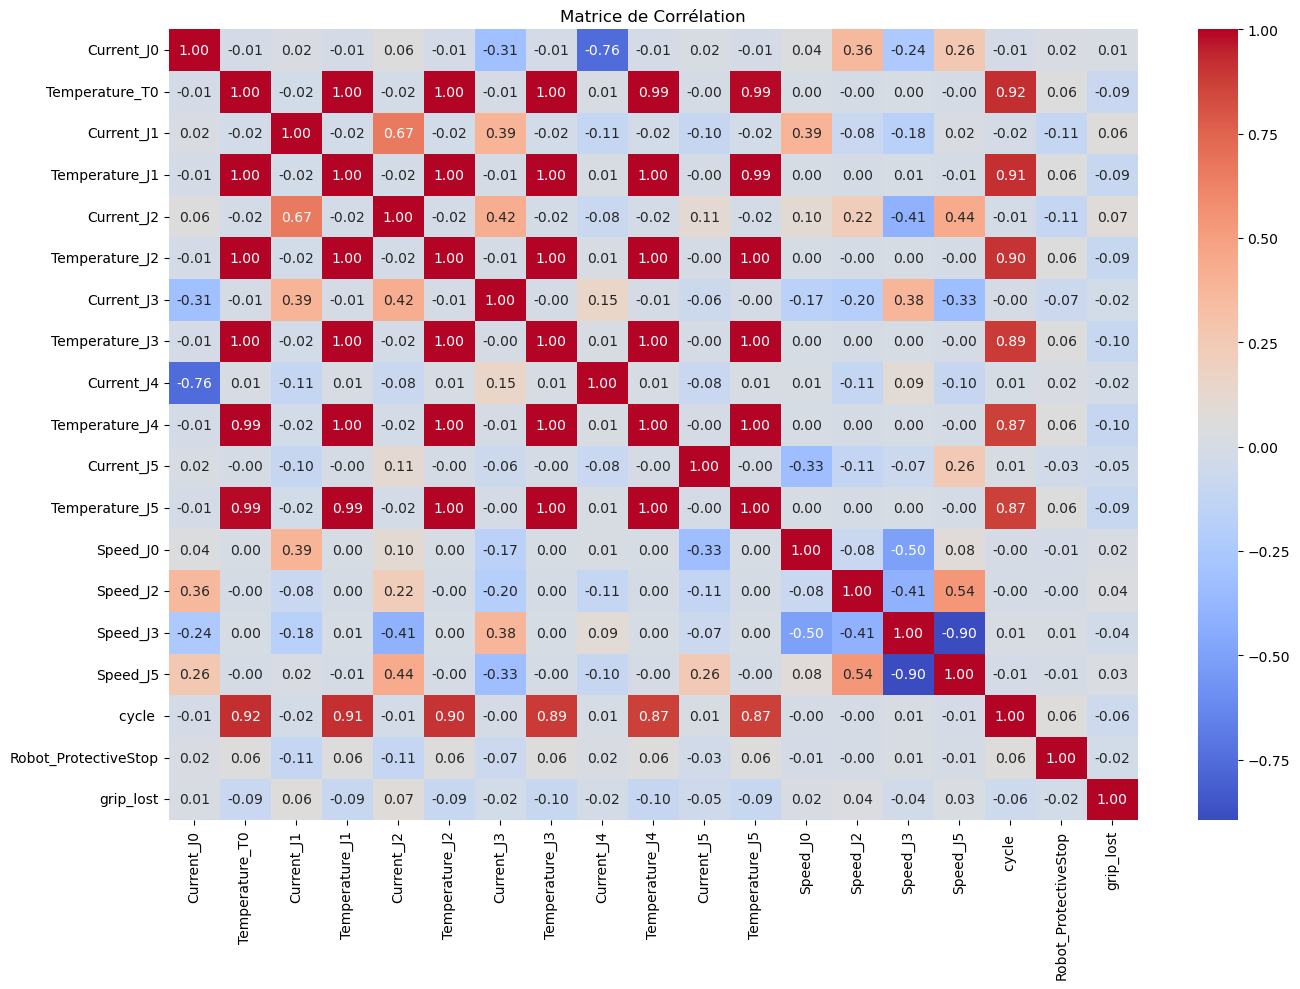

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

vis_data = df_filtered.drop(columns=["Timestamp","Num"], errors="ignore")

corr = vis_data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de Corrélation")
plt.tight_layout()
plt.show()

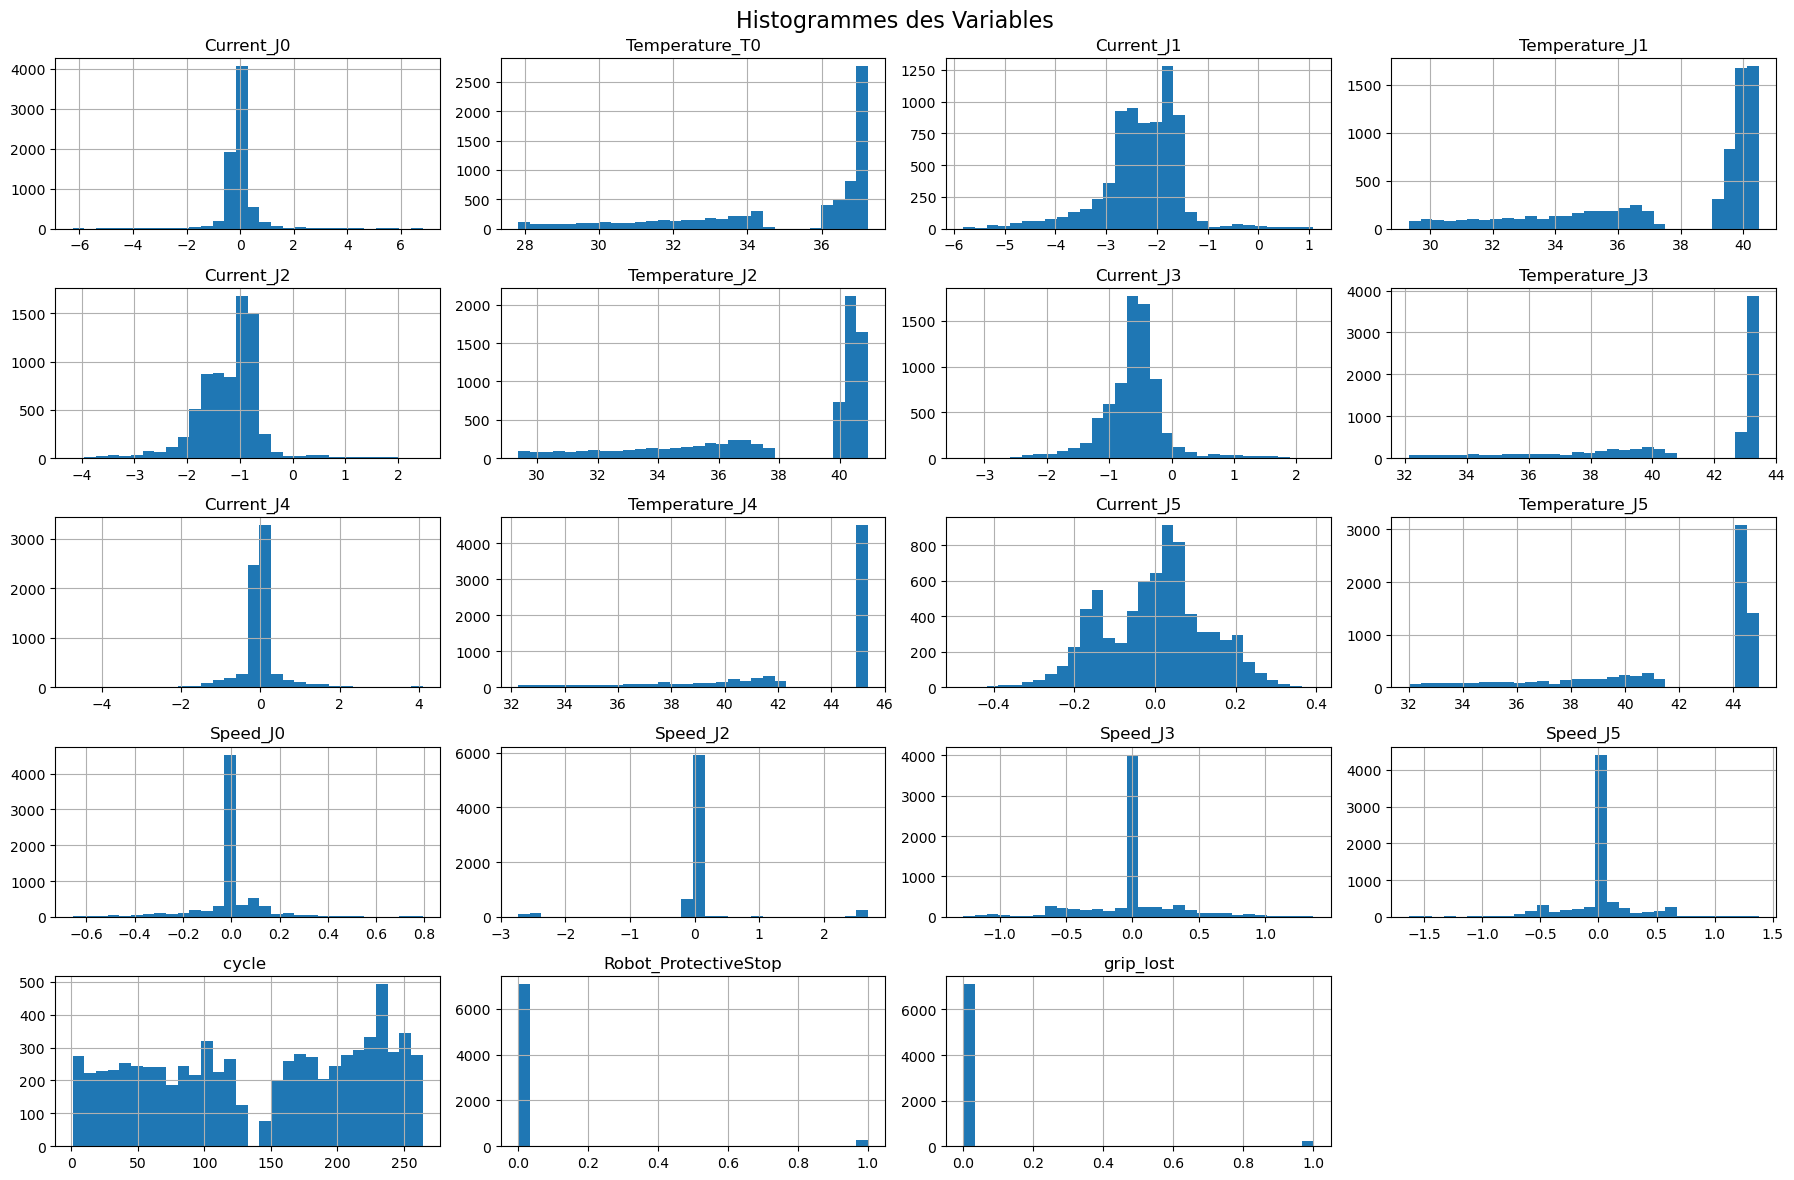

In [11]:
import matplotlib.pyplot as plt
vis_data = df_filtered.drop(columns=['Timestamp'], errors='ignore')

vis_data.hist(figsize=(18, 12), bins=30)
plt.suptitle("Histogrammes des Variables", fontsize=16)
plt.tight_layout()
plt.show()

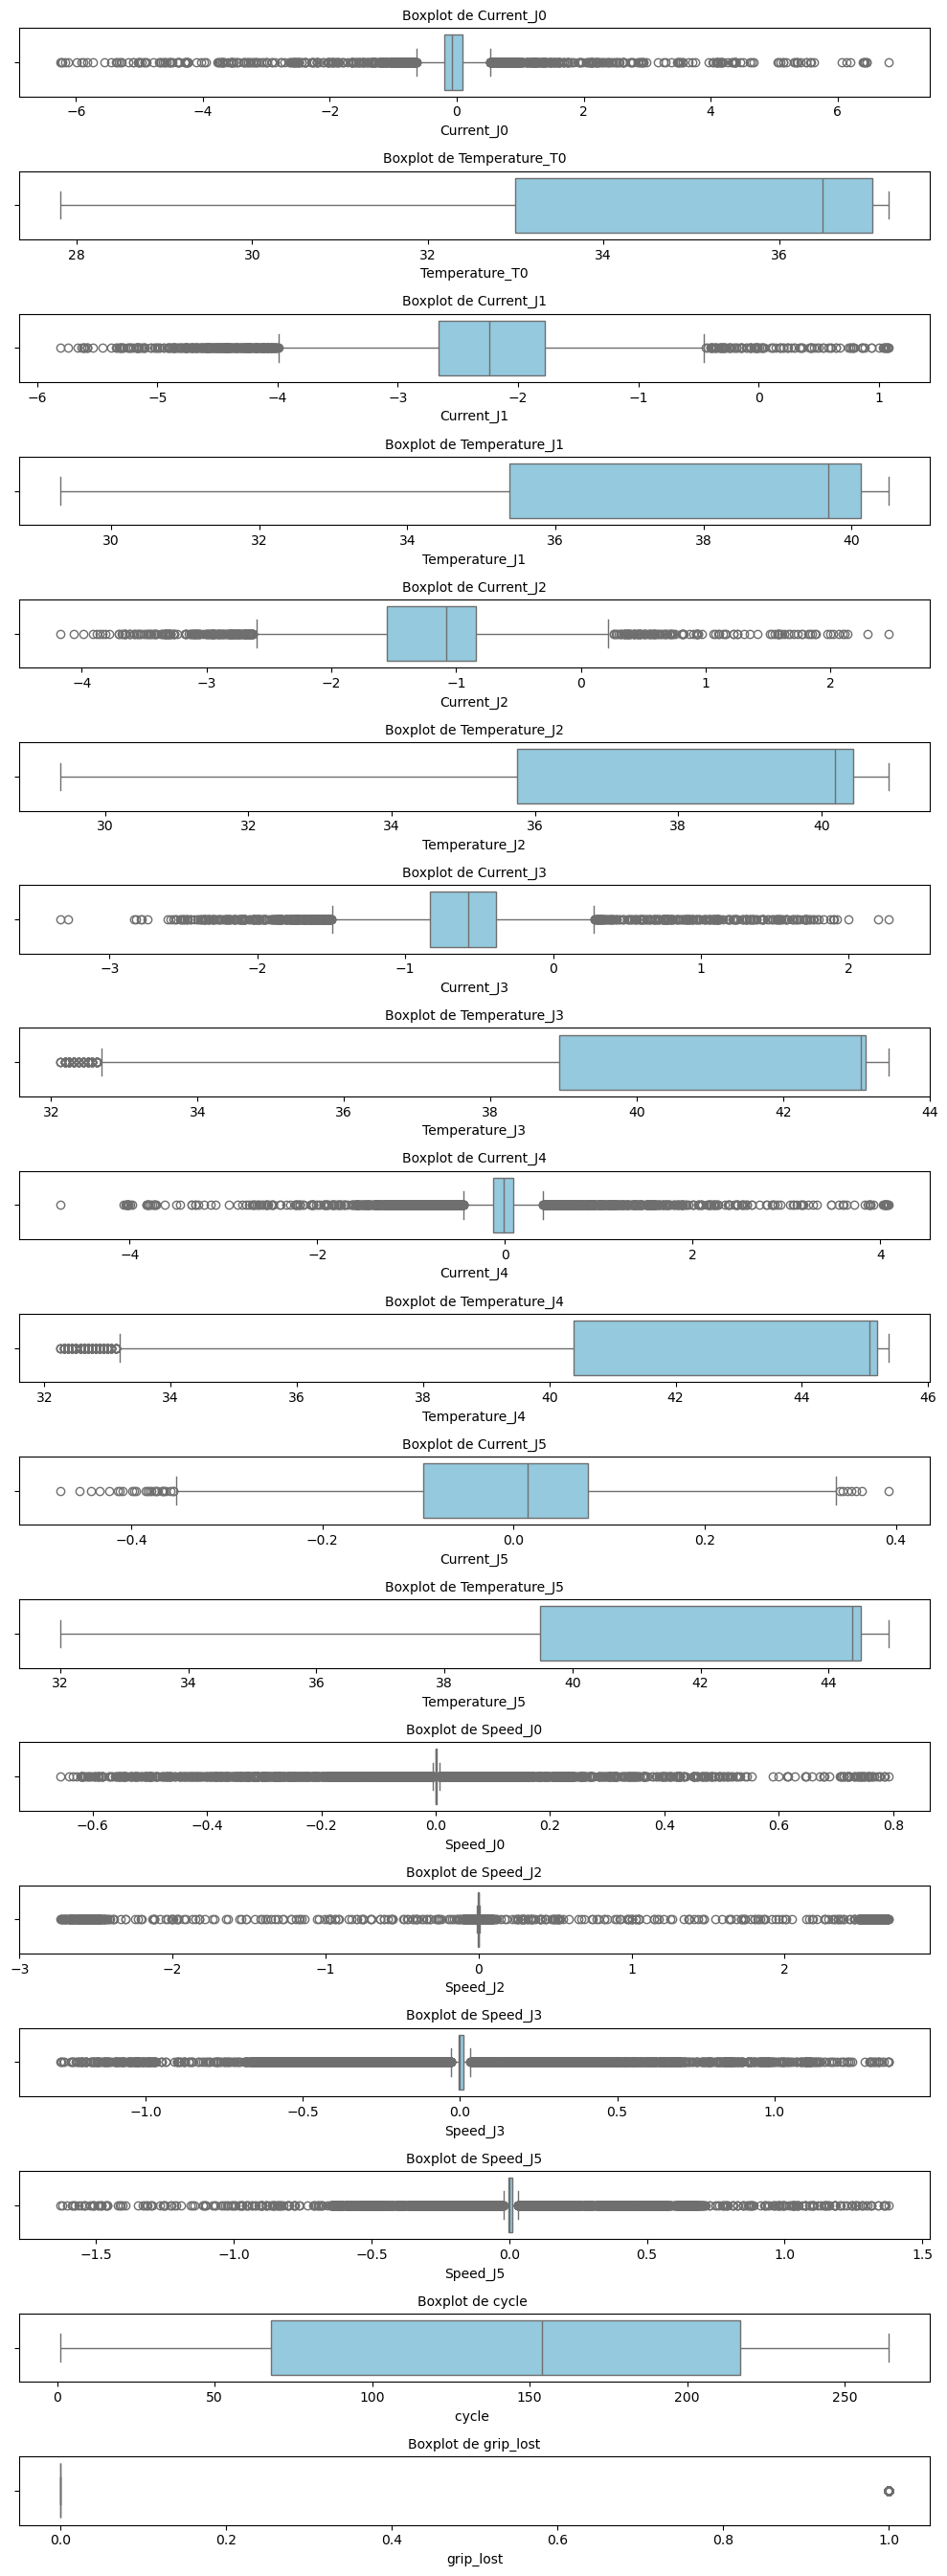

In [12]:
import seaborn as sns
features = vis_data.columns.drop("Robot_ProtectiveStop")

plt.figure(figsize=(10, len(features) * 1.5))
for i, col in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    sns.boxplot(x=vis_data[col], color="skyblue")
    plt.title(f"Boxplot de {col}", fontsize=10)
    plt.tight_layout()
plt.show()

Nos données contiennent de nombreuses valeurs aberrantes. Dois-je les supprimer ? 

Ces valeurs aberrantes peuvent représenter des phénomènes réels, et non du bruit (par exemple, des pics soudains de courant/température avant un arrêt de protection).
Puisque nous modélisons des défaillances ou des anomalies, les valeurs aberrantes peuvent contenir des signaux prédictifs critiques.

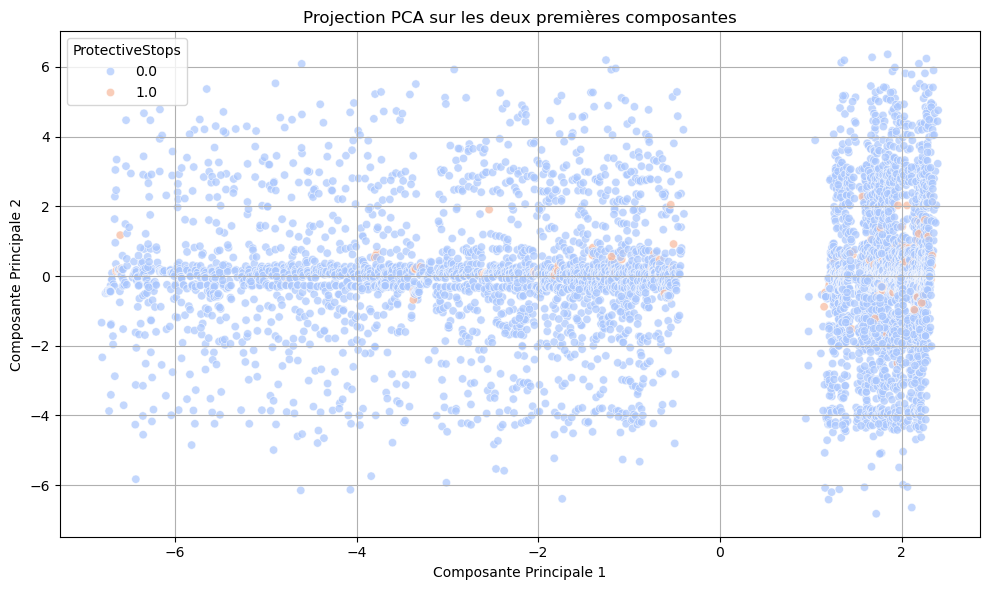

Variance expliquée par la composante principale 1 : 37.91%
Variance expliquée par la composante principale 2 : 16.58%
Variance expliquée par la composante principale 3 : 11.61%
Variance expliquée par la composante principale 4 : 8.42%


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

target = vis_data["Robot_ProtectiveStop"]
features = vis_data.drop(columns=["Robot_ProtectiveStop"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2", "PC3", "PC4"])
pca_df["ProtectiveStops"] = target.values

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="ProtectiveStops",
    palette="coolwarm",
    alpha=0.7
)
plt.title("Projection PCA sur les deux premières composantes")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.legend(title="ProtectiveStops")
plt.grid(True)
plt.tight_layout()
plt.show()

explained_variance = pca.explained_variance_ratio_
for i, var in enumerate(explained_variance):
    print(f"Variance expliquée par la composante principale {i+1} : {var*100:.2f}%")

L'ACP confirme que notre classification est séparable de manière non linéaire. 
Les modèles tels que LSTM, XGBoost, Random Forest sont non linéaires et peuvent gérer cela.

In [14]:
# Calculer les effectifs de chaque classe dans la colonne "Robot_ProtectiveStop"
class_counts = df_filtered["Robot_ProtectiveStop"].value_counts()

print("Effectifs de chaque classe dans 'Robot_ProtectiveStop' :")
print(class_counts)

Effectifs de chaque classe dans 'Robot_ProtectiveStop' :
Robot_ProtectiveStop
0.0    7077
1.0     278
Name: count, dtype: int64


### SMOTE

In [15]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

X = df_filtered.drop(columns=['Robot_ProtectiveStop', 'Timestamp'])
y = df_filtered['Robot_ProtectiveStop'].astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_series = pd.Series(y_resampled, name='Robot_ProtectiveStop')

X_resampled_df = X_resampled_df.reset_index(drop=True)
y_resampled_series = y_resampled_series.reset_index(drop=True)

print("Distribution après SMOTE :")
print(y_resampled_series.value_counts())

Distribution après SMOTE :
Robot_ProtectiveStop
0    7077
1    7077
Name: count, dtype: int64


# LSTM

In [16]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

def create_sequences(X, y, window_size=10):
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i:i+window_size])
        y_seq.append(y[i+window_size])
    return np.array(X_seq), np.array(y_seq)

X = df_filtered.drop(columns=['Robot_ProtectiveStop', 'Timestamp'])
y = df_filtered['Robot_ProtectiveStop'].astype(int)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
X_seq, y_seq = create_sequences(X_resampled, y_resampled, window_size=10)

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return self.sigmoid(out)

X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, shuffle=True, random_state=42
)

In [ ]:
!pip install wandb

In [19]:
import wandb

wandb.init(
    project="protection-stop",
    name="LSTM_train_test_split",
    config={
        "model": "LSTM",
        "epochs": 200,
        "hidden_size": 64,
        "learning_rate": 0.001,
        "window_size": X_train.shape[1],
        "features": X_train.shape[2]
    }
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_t = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_t = torch.tensor(y_train, dtype=torch.float32).view(-1,1).to(device)
X_test_t  = torch.tensor(X_test,  dtype=torch.float32).to(device)
y_test_t  = torch.tensor(y_test,  dtype=torch.float32).view(-1,1).to(device)

model = LSTMModel(input_size=X_train.shape[2], hidden_size=64).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_t)
    loss = criterion(output, y_train_t)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 5 == 0:
        print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")

wandb.finish()

Epoch 5 - Loss: 0.6754
Epoch 10 - Loss: 0.6505
Epoch 15 - Loss: 0.6237
Epoch 20 - Loss: 0.5905
Epoch 25 - Loss: 0.5445
Epoch 30 - Loss: 0.4800
Epoch 35 - Loss: 0.4024
Epoch 40 - Loss: 0.3360
Epoch 45 - Loss: 0.2979
Epoch 50 - Loss: 0.2628
Epoch 55 - Loss: 0.2214
Epoch 60 - Loss: 0.1906
Epoch 65 - Loss: 0.1673
Epoch 70 - Loss: 0.1478
Epoch 75 - Loss: 0.1332
Epoch 80 - Loss: 0.1208
Epoch 85 - Loss: 0.1119
Epoch 90 - Loss: 0.1059
Epoch 95 - Loss: 0.1013
Epoch 100 - Loss: 0.0979
Epoch 105 - Loss: 0.0951
Epoch 110 - Loss: 0.0925
Epoch 115 - Loss: 0.0905
Epoch 120 - Loss: 0.0888
Epoch 125 - Loss: 0.0873
Epoch 130 - Loss: 0.0860
Epoch 135 - Loss: 0.0848
Epoch 140 - Loss: 0.0837
Epoch 145 - Loss: 0.0826
Epoch 150 - Loss: 0.0816
Epoch 155 - Loss: 0.0806
Epoch 160 - Loss: 0.0796
Epoch 165 - Loss: 0.0786
Epoch 170 - Loss: 0.0777
Epoch 175 - Loss: 0.0768
Epoch 180 - Loss: 0.0759
Epoch 185 - Loss: 0.0750
Epoch 190 - Loss: 0.0741
Epoch 195 - Loss: 0.0732
Epoch 200 - Loss: 0.0723


In [20]:
model.eval()
with torch.no_grad():
    y_pred_prob = model(X_test_t)
    y_pred = (y_pred_prob > 0.5).float()

y_true = y_test_t.cpu().numpy().ravel()
y_pred_bin = y_pred.cpu().numpy().ravel()

acc  = accuracy_score(y_true, y_pred_bin)
prec = precision_score(y_true, y_pred_bin, zero_division=0)
rec  = recall_score(y_true, y_pred_bin, zero_division=0)
f1   = f1_score(y_true, y_pred_bin, zero_division=0)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

Accuracy : 0.9806
Precision: 0.9956
Recall   : 0.9654
F1 Score : 0.9803


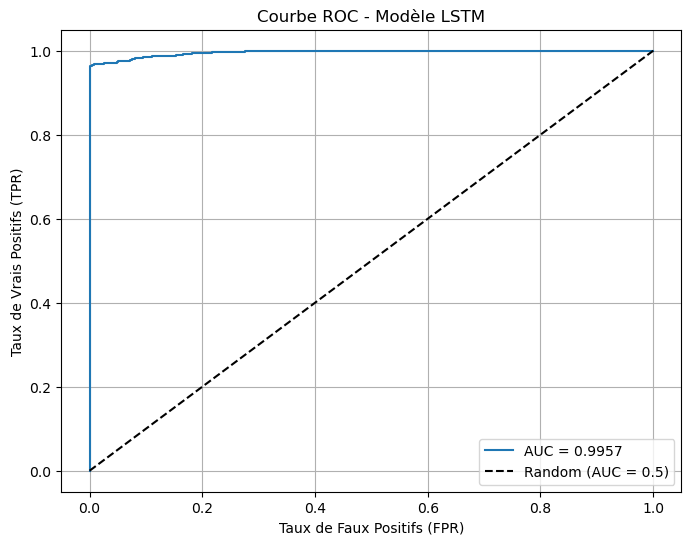

test_accuracy,▁
test_auc,▁
test_f1,▁
test_precision,▁
test_recall,▁
test_accuracy,0.98056
test_auc,0.99565
test_f1,0.98029
test_precision,0.99563
test_recall,0.96542


In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import wandb

wandb.init(
    project="protection-stop",
    name="LSTM_ROC_eval",
    config={
        "model": "LSTM",
        "task": "roc_evaluation"
    }
)


y_true = y_test_t.cpu().numpy().ravel()
y_score = y_pred_prob.cpu().numpy().ravel()


fpr, tpr, thresholds = roc_curve(y_true, y_score)
auc_score = roc_auc_score(y_true, y_score)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - Modèle LSTM")
plt.legend()
plt.grid(True)
plt.show()

wandb.log({
    "test_accuracy": acc,
    "test_precision": prec,
    "test_recall": rec,
    "test_f1": f1,
    "test_auc": auc_score
})

wandb.finish()

La courbe est très proche du coin supérieur gauche, ce qui signifie que le modèle déclenche très peu de fausses alertes (faible FPR),
Il capte quasiment tous les vrais arrêts (haut TPR),
L’AUC de 0.9957 confirme une capacité quasi-parfaite de séparation entre les états "protection" et "non-protection".

Par contre, il pourrait s'agir d'un overfitting.

In [23]:
# Sauvegarder les poids dans un fichier
torch.save(model.state_dict(), "lstm_trained.pth")

# Comparaison avec d'autres modèles

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_resampled, y_resampled, test_size=0.2, shuffle=True, random_state=42
)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test_rf)
y_proba_rf = rf_model.predict_proba(X_test_rf)[:, 1]

# Prédictions
y_pred_rf = rf_model.predict(X_test_rf)
y_proba_rf = rf_model.predict_proba(X_test_rf)[:, 1]

# Métriques
acc_rf  = accuracy_score(y_test_rf, y_pred_rf)
prec_rf = precision_score(y_test_rf, y_pred_rf, zero_division=0)
rec_rf  = recall_score(y_test_rf, y_pred_rf, zero_division=0)
f1_rf   = f1_score(y_test_rf, y_pred_rf, zero_division=0)
auc_rf  = roc_auc_score(y_test_rf, y_proba_rf)

print(f"Random Forest Accuracy : {acc_rf:.4f}")
print(f"Random Forest Precision: {prec_rf:.4f}")
print(f"Random Forest Recall   : {rec_rf:.4f}")
print(f"Random Forest F1 Score : {f1_rf:.4f}")
print(f"Random Forest AUC      : {auc_rf:.4f}")


Random Forest Accuracy : 0.9848
Random Forest Precision: 0.9748
Random Forest Recall   : 0.9950
Random Forest F1 Score : 0.9848
Random Forest AUC      : 0.9982


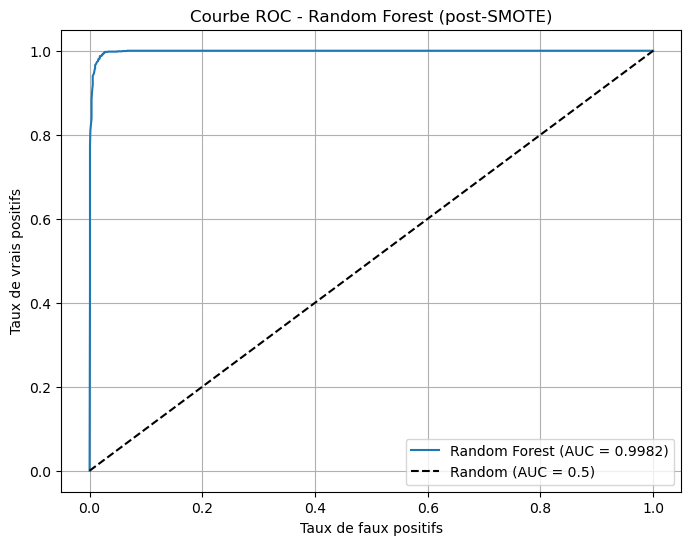

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test_rf, y_proba_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC - Random Forest (post-SMOTE)")
plt.legend()
plt.grid(True)
plt.show()


## XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Ignore les UserWarnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Ignore les FutureWarnings

# Initialisation des métriques
acc_scores, prec_scores, rec_scores, f1_scores, auc_scores = [], [], [], [], []

# K-Fold stratifié
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Modèle XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Boucle de validation croisée
for fold, (train_idx, test_idx) in enumerate(kfold.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled[train_idx], X_resampled[test_idx]
    y_train, y_test = y_resampled[train_idx], y_resampled[test_idx]

    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    y_proba = xgb_model.predict_proba(X_test)[:, 1]

    acc_scores.append(accuracy_score(y_test, y_pred))
    prec_scores.append(precision_score(y_test, y_pred, zero_division=0))
    rec_scores.append(recall_score(y_test, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred, zero_division=0))
    auc_scores.append(roc_auc_score(y_test, y_proba))

    print(f"Fold {fold} - Acc: {acc_scores[-1]:.4f}, Prec: {prec_scores[-1]:.4f}, Recall: {rec_scores[-1]:.4f}, F1: {f1_scores[-1]:.4f}, AUC: {auc_scores[-1]:.4f}")


Fold 1 - Acc: 0.9774, Prec: 0.9598, Recall: 0.9965, F1: 0.9778, AUC: 0.9978
Fold 2 - Acc: 0.9792, Prec: 0.9644, Recall: 0.9951, F1: 0.9795, AUC: 0.9982
Fold 3 - Acc: 0.9830, Prec: 0.9698, Recall: 0.9972, F1: 0.9833, AUC: 0.9983
Fold 4 - Acc: 0.9792, Prec: 0.9644, Recall: 0.9951, F1: 0.9795, AUC: 0.9972
Fold 5 - Acc: 0.9784, Prec: 0.9637, Recall: 0.9943, F1: 0.9788, AUC: 0.9982


In [ ]:
print("\n=== Moyennes globales sur les 5 folds ===")
print(f"Accuracy  : {np.mean(acc_scores):.4f}")
print(f"Precision : {np.mean(prec_scores):.4f}")
print(f"Recall    : {np.mean(rec_scores):.4f}")
print(f"F1 Score  : {np.mean(f1_scores):.4f}")
print(f"AUC       : {np.mean(auc_scores):.4f}")


=== Moyennes globales sur les 5 folds ===
Accuracy  : 0.9794
Precision : 0.9644
Recall    : 0.9956
F1 Score  : 0.9798
AUC       : 0.9979


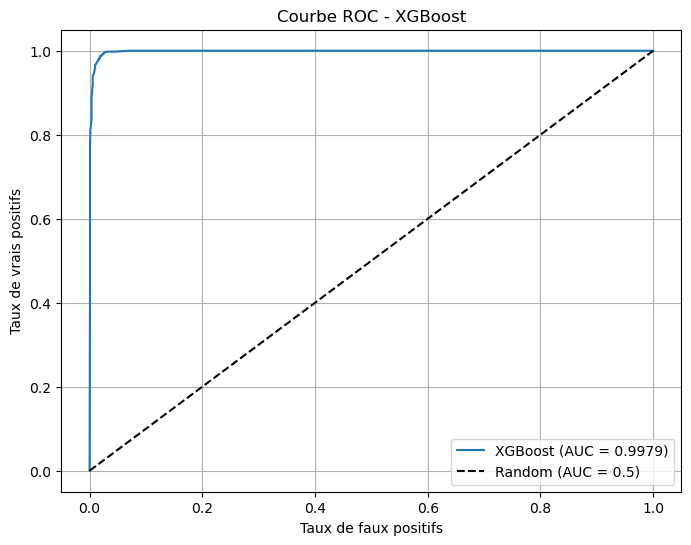

In [ ]:
fpr_XGB, tpr_XGB, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f"XGBoost (AUC = {np.mean(auc_scores):.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC - XGBoost")
plt.legend()
plt.grid(True)
plt.show()


### Comparaison globale

In [ ]:
data = {
    "Modèle": ["LSTM", "Random Forest", "XGBoost"],
    "Accuracy":  [0.9806, 0.9848, 0.9794],
    "Precision": [0.9949, 0.9748, 0.9644],
    "Recall":    [0.9661, 0.9950, 0.9956],
    "F1 Score":  [0.9803, 0.9848, 0.9798],
    "AUC":       [0.9957, 0.9982, 0.9979]
}

df_comp = pd.DataFrame(data)
print(df_comp.to_string(index=False))

       Modèle  Accuracy  Precision  Recall  F1 Score    AUC
         LSTM    0.9806     0.9949  0.9661    0.9803 0.9957
Random Forest    0.9848     0.9748  0.9950    0.9848 0.9982
      XGBoost    0.9794     0.9644  0.9956    0.9798 0.9979


Les trois modèles testés atteignent des performances élevées sur les données prétraitées avec SMOTE. Le modèle LSTM excelle en précision, ce qui le rend particulièrement adapté aux contextes où il faut éviter les faux positifs. À l’inverse, XGBoost et Random Forest montrent une capacité supérieure à capturer tous les arrêts réels, avec un rappel au-delà de 99.5%. Tous les modèles offrent une excellente séparation (AUC > 0.99), confirmant la pertinence des variables et de la stratégie de fenêtrage. Le choix final dépendra donc du compromis entre rappel et précision requis par l’usage industriel.

# Wandb